In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
functions_list = ['deJong', 'schwefel', 'michalewicz', 'rastringin']
dimensions = [5, 10, 30]
algos = ['bihc', 'fihc', 'wihc', 'sa']

In [3]:
all_files = os.listdir("output_files")

In [4]:
def filter_files(function, dimension, algo):
    filtered_files = []
    for item in all_files:
        if algo in item and function in item and f'd{dimension}' in item:
            filtered_files.append(f"output_files/{item}")
    return filtered_files

In [5]:
def get_runs_report(files_to_check, detailed=False):
    elements = []
    for item in files_to_check:
        elem_loc = []
        f = open(item, 'r+')
        lines = [line for line in f.readlines()]
        for line in lines:
            if '|' in line:
                line = line.replace('\n', '')
                parts = line.split('|')
                itter = parts[0]
                fitness = parts[-1]
                elem_loc.append([int(itter), float(fitness)])  
        if detailed == False:
            elements.append(elem_loc[-1])
        else:
            elements.append(elem_loc)
        f.close()
    return elements

In [6]:
def convert_to_pandas(matrix, detailed=False):
    if detailed == False:
        df = pd.DataFrame(matrix, columns=["Best iteration", "Fitness"])
        return df
    else: 
        return pd.DataFrame([])

In [24]:
def print_statistics(df, latex=False, function='', dimension = 0):
    if latex == False:
        print(f'Min:  {np.min(df["Fitness"])}')
        print(f'Max:  {np.max(df["Fitness"])}')
        print(f'Avg:  {np.average(df["Fitness"])}')
        print(f'Std:  {np.std(df["Fitness"])}')
        print(f'Mean: {np.mean(df["Fitness"])}')
        print("Quantiles")
        print(df["Fitness"].quantile([0.25,0.75]))
        print(f'Avg steps: {np.average(df["Best iteration"])}')
    else:
        min = round(np.min(df["Fitness"]), 5)
        max = round(np.max(df["Fitness"]), 5)
        avg = round(np.average(df["Fitness"]), 5)
        std = round(np.std(df["Fitness"]), 5)
        mean = round(np.mean(df["Fitness"]), 5)
        quantiles = df["Fitness"].quantile([0.25,0.75]).values
        print(f"{function}&{dimension}&{min}&{max}&{avg}&{std}&{mean}&{round(quantiles[0], 5)}&{round(quantiles[1], 5)} \\\\ \hline")


In [26]:
for algo in algos:
    print(algo)
    for function in functions_list:
        for dimension in dimensions:
            files = filter_files(function, dimension, algo)
            report = get_runs_report(files)
            df = convert_to_pandas(report)
            # print_statistics(df, latex=True, function = function, dimension = dimension)
            print_statistics(df)
            print("------")
        # print("\hline")

bihc
Min:  0.00310352
Max:  0.00967497
Avg:  0.00754483075
Std:  0.0015018530891458518
Mean: 0.00754483075
Quantiles
0.25    0.006750
0.75    0.008714
Name: Fitness, dtype: float64
Avg steps: 14.175
------
Min:  0.00710258
Max:  0.00997914
Avg:  0.00881168475
Std:  0.0008071384327176704
Mean: 0.00881168475
Quantiles
0.25    0.008248
0.75    0.009522
Name: Fitness, dtype: float64
Avg steps: 30.425
------
Min:  0.00904605
Max:  0.00996626
Avg:  0.009600708
Std:  0.00026744442461191815
Mean: 0.009600708
Quantiles
0.25    0.009409
0.75    0.009834
Name: Fitness, dtype: float64
Avg steps: 104.2
------
Min:  -1976.16
Max:  -1142.96
Avg:  -1636.1385
Std:  213.4922355444104
Mean: -1636.1385
Quantiles
0.25   -1824.620
0.75   -1503.295
Name: Fitness, dtype: float64
Avg steps: 190.675
------
Min:  -3824.77
Max:  -2497.02
Avg:  -3290.2957499999998
Std:  288.24926272141187
Mean: -3290.2957499999998
Quantiles
0.25   -3473.8375
0.75   -3079.9875
Name: Fitness, dtype: float64
Avg steps: 227.85
------


In [9]:
def generate_side_by_side_report(function, algo):
    files = filter_files(function, 5, algo)
    report5 = get_runs_report(files)

    files = filter_files(function, 10, algo)
    report10 = get_runs_report(files)

    files = filter_files(function, 30, algo)
    report30 = get_runs_report(files)
    
    for i in range(0, len(report5)):
        print(f"{report5[i][0]}&{report5[i][1]}&{report10[i][0]}&{report10[i][1]}&{report30[i][0]}&{report30[i][1]} \\\\ \hline")

In [10]:
files = filter_files('rastringin', 5, 'sa')
report = get_runs_report(files)
df = convert_to_pandas(report)
print_statistics(df)

Min:  4.73003e-09
Max:  3.85727e-06
Avg:  3.057130443333333e-07
Std:  9.752265004400298e-07
Mean: 3.057130443333333e-07
Quantiles
0.25    4.730050e-09
0.75    4.730050e-09
Name: Fitness, dtype: float64


In [11]:
generate_side_by_side_report('rastringin', 'sa')

6&4.73005e-09&62&3.93295e-06&4999&3.70747 \\ \hline
0&4.73005e-09&7&0.000598023&49999&4.9433 \\ \hline
4&4.73005e-09&5&0.00259823&999&6.17911 \\ \hline
0&4.73005e-09&7&0.000962261&4999&8.15952 \\ \hline
0&4.73005e-09&10&0.00152401&49999&4.94327 \\ \hline
0&4.73005e-09&19&0.000457193&999&8.65076 \\ \hline
2&4.73005e-09&24&0.000308609&4999&8.65074 \\ \hline
0&4.73005e-09&3&0.00431676&49999&8.65077 \\ \hline
4&4.73005e-09&30&0.000454544&49999&3.70747 \\ \hline
0&4.73003e-09&1&0.000884142&167&6.17914 \\ \hline
0&4.73005e-09&8&0.00106053&49999&4.9433 \\ \hline
0&4.73005e-09&16&0.00995165&49999&4.9433 \\ \hline
1&4.73005e-09&5&0.00240344&4999&7.17912 \\ \hline
0&4.73005e-09&21&0.000109608&4999&8.65074 \\ \hline
3&4.73005e-09&1&0.000777274&91&5.00679 \\ \hline
0&4.73005e-09&10&0.00336022&49999&7.41493 \\ \hline
6&4.73005e-09&4&0.00135193&49999&6.23421 \\ \hline
14&4.73005e-09&0&0.00348071&49999&3.70747 \\ \hline
1&4.73005e-09&2&0.000608203&49999&6.17911 \\ \hline
14&1.36698e-06&17&0.000627421

In [12]:
def generate_fitness_plots(function, algo, dimension, save_to_file=False, clear=False):
    files = filter_files(function, dimension, algo)
    reports = get_runs_report(files, True)
    i = 0
    plt.title(f"{function} - {algo} - {dimension}d")
    plt.xlabel("Iteratie")
    plt.ylabel("Best value")
    for report in reports:
        if clear:
            plt.clf()
        plot = []
        for r in report:
            plot.append(r[1])
        plt.plot(plot)
        if save_to_file:
            try:
                os.mkdir("fitness_graphs")
            except:
                pass
            plt.savefig(f'fitness_graphs/{function}_{algo}_{dimension}_{i}.png')
            i+=1

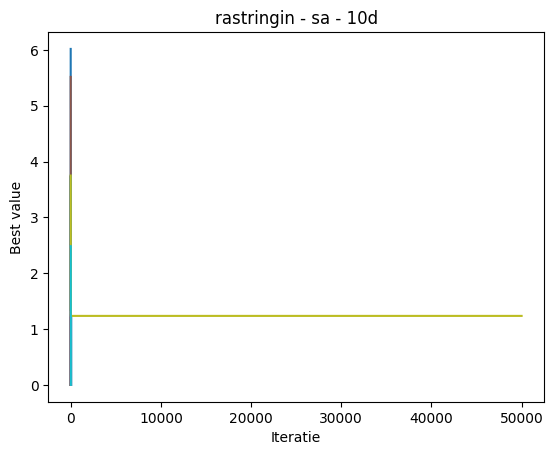

In [19]:
generate_fitness_plots('rastringin', 'sa', 10, False, False)